In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('2013_movies.csv')

In [5]:
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
...,...,...,...,...,...,...,...
95,Rush,38000000.0,26947624,Ron Howard,R,123,2013-09-20 00:00:00
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,2013-03-29 00:00:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01 00:00:00


In [72]:
df['date'] = pd.to_datetime(df['ReleaseDate'])
df['month_name'] = df['date'].dt.month_name()
df['month'] = df['date'].dt.month

In [73]:
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,date,month,month_name
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,2013-11-22,11,November
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,2013-05-03,5,May
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,2013-11-22,11,November
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,2013-07-03,7,July
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,2013-06-14,6,June
...,...,...,...,...,...,...,...,...,...,...
95,Rush,38000000.0,26947624,Ron Howard,R,123,2013-09-20 00:00:00,2013-09-20,9,September
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,2013-03-29 00:00:00,2013-03-29,3,March
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00,2013-08-23,8,August
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01 00:00:00,2013-03-01,3,March


Text(0.5, 1.0, 'Domestic Gross Over time')

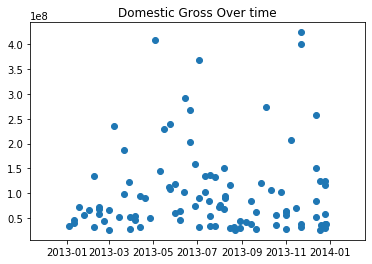

In [74]:
x = df['date']
y = df['DomesticTotalGross']
plt.scatter(x, y)
plt.title('Domestic Gross Over time')

Text(0.5, 1.0, 'Runtime vs Domestic Gross')

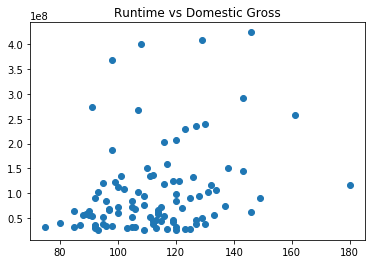

In [75]:
plt.scatter(df['Runtime'], y)
plt.title('Runtime vs Domestic Gross')

In [76]:
rating = df.groupby(['Rating'])['DomesticTotalGross', 'Runtime'].mean().reset_index()

In [77]:
rating

,Rating,DomesticTotalGross,Runtime
0,G,2.684928e+08,107.000000
1,PG,1.311357e+08,99.933333
2,PG-13,1.114498e+08,117.510638
3,R,6.989243e+07,110.729730


In [78]:
# rating masks
rateg = df[df['Rating'] == 'G']
ratepg = df[df['Rating'] == 'PG']
ratepg13 = df[df['Rating'] == 'PG-13']
rater = df[df['Rating'] == 'R']


In [79]:
dom = 'DomesticTotalGross'

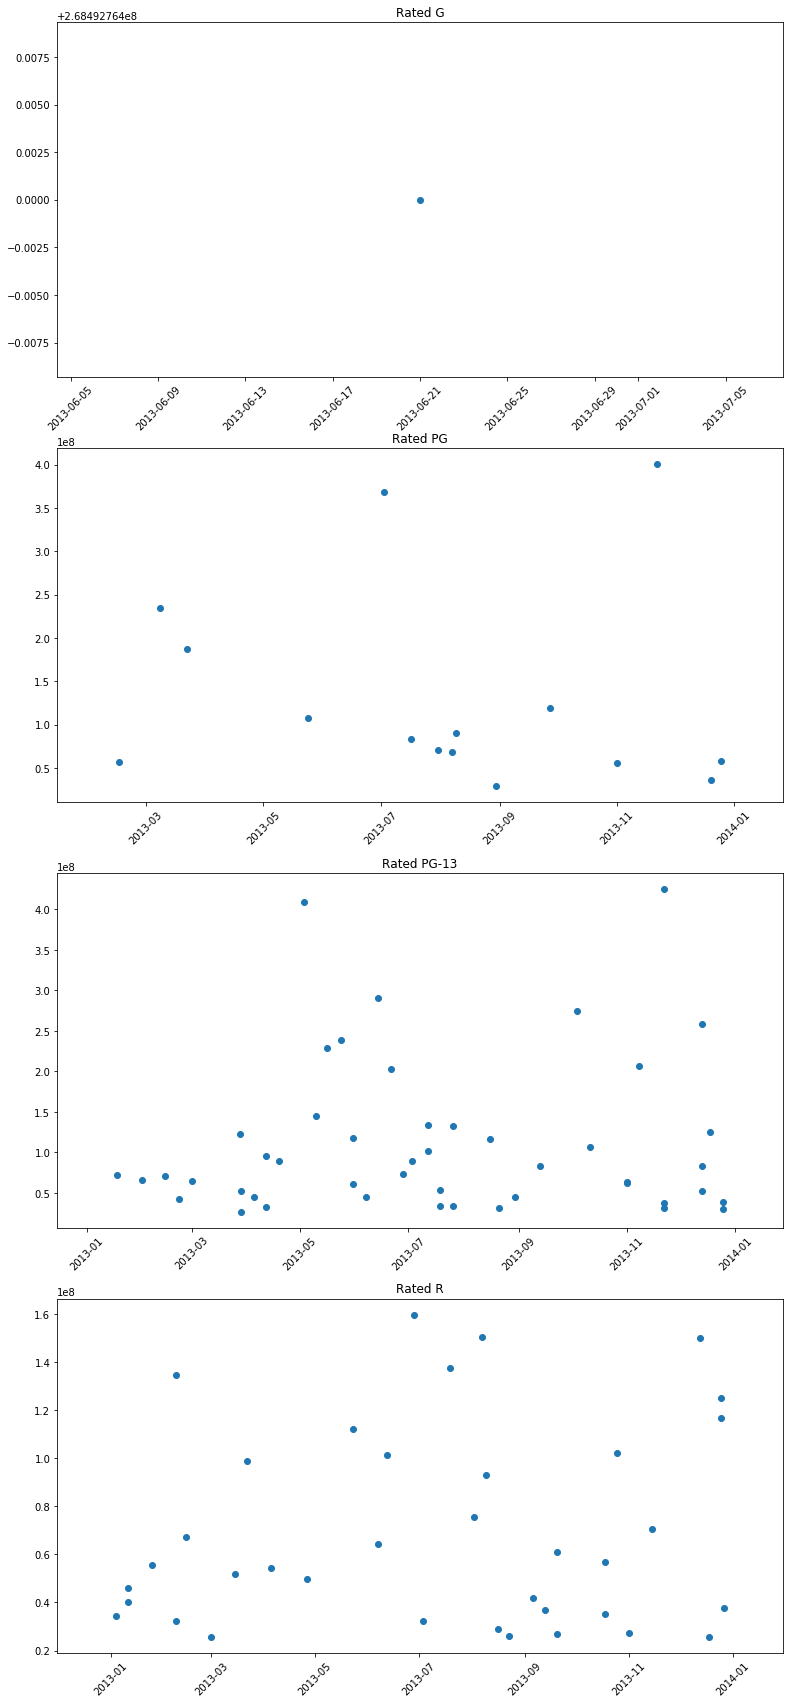

In [80]:
plt.figure(figsize=(13,30))

plt.subplot(4, 1, 1)
plt.title('Rated G')
plt.xticks(rotation=45)
plt.scatter(rateg['date'], rateg[dom])

plt.subplot(4,1,2)
plt.title('Rated PG')
plt.xticks(rotation=45)
plt.scatter(ratepg['date'], ratepg[dom])

plt.subplot(4, 1, 3)
plt.title('Rated PG-13')
plt.xticks(rotation=45)
plt.scatter(ratepg13['date'], ratepg13[dom])

plt.subplot(4,1,4)
plt.title('Rated R')
plt.xticks(rotation=45)
plt.scatter(rater['date'], rater[dom])

In [81]:
director = df.groupby(['Director'])[dom].mean()

In [82]:
director.sort_values(ascending=False)

Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
                               ...    
Ron Howard                    26947624
Andrew Niccol                 26627201
Edgar Wright                  26004851
Jon LucasScott Moore          25682380
Spike Jonze                   25568251
Name: DomesticTotalGross, Length: 93, dtype: int64

In [124]:
months = df.groupby(['month', 'month_name']).agg({dom:['mean', 'std']}).reset_index()
months.columns = ['month', 'month_name', 'mean', 'std']
months.sort_values(by='month')

,month,month_name,mean,std
0,1,January,4.954324e+07,1.465947e+07
1,2,February,6.738601e+07,3.283185e+07
2,3,March,9.609710e+07,7.323942e+07
3,4,April,6.094072e+07,2.530104e+07
4,5,May,1.774097e+08,1.117754e+08
5,6,June,1.506500e+08,9.519994e+07
6,7,July,1.057807e+08,9.140837e+07
7,8,August,6.853126e+07,4.132232e+07
8,9,September,6.171231e+07,3.482327e+07
9,10,October,1.150270e+08,9.394330e+07


In [119]:
months.columns

MultiIndex([('DomesticTotalGross', 'mean'),
            ('DomesticTotalGross',  'std')],
           )

0     4.954324e+07
1     6.738601e+07
2     9.609710e+07
3     6.094072e+07
4     1.774097e+08
5     1.506500e+08
6     1.057807e+08
7     6.853126e+07
8     6.171231e+07
9     1.150270e+08
10    1.379368e+08
11    8.748339e+07
Name: mean, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

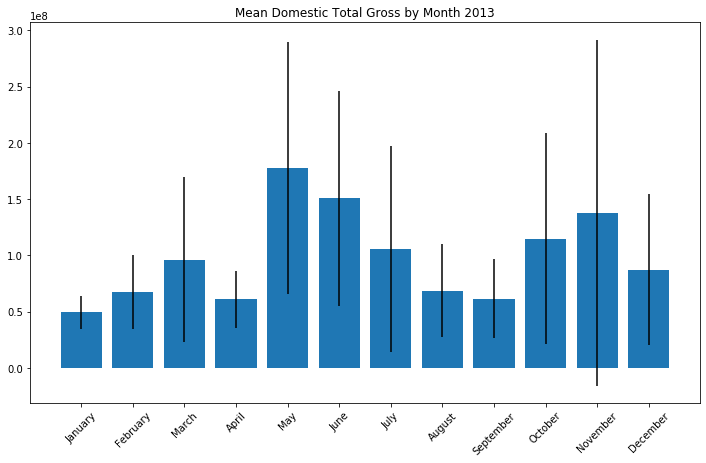

In [128]:
plt.figure(figsize=(12,7))
plt.bar(months['month_name'], months['mean'],yerr=months['std'])
plt.title('Mean Domestic Total Gross by Month 2013')
plt.xticks(rotation=45)